In [1]:
import pandas as pd
import numpy as np

from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
import itertools
np.random.seed(2)

In [2]:
# READ DATASET
train = pd.read_csv("train.csv")
test = pd.read_csv("test.csv")

In [3]:
# PREPARE DATA
Y_train = train["label"]
X_train = train.drop(labels = ["label"], axis = 1)
X_train = X_train.values.reshape(-1,28,28,1)
X_test = test.values.reshape(-1,28,28,1)
# free some space
del train

In [4]:
# NORMALIZE DATA
X_train = X_train/255.0
X_test = X_test/255.0

In [5]:
import matplotlib.pyplot as plt
# PREVIEW IMAGES
for i in range(40):  
    plt.subplot(4, 10, i+1)
    plt.imshow(X_train[i].reshape((28,28)),cmap=plt.cm.binary)
    plt.axis('off')
plt.show()

<Figure size 640x480 with 40 Axes>

In [6]:
X_train = X_train.reshape(X_train.shape[0], 784)
Y_train = Y_train.values.ravel()#.values will give the values in an array. (shape: (n,1)
                                #.ravel will convert that array shape to (n, )
# Standarize features
scaler = StandardScaler()
X_train_std = scaler.fit_transform(X_train)

In [7]:
# Set the random seed
random_seed = 2
X_train, X_val, Y_train, Y_val = train_test_split(X_train_std, Y_train, test_size = 0.1, random_state=random_seed)

In [8]:
# Create one-vs-rest logistic regression object
clf = LogisticRegression(random_state=0, multi_class='multinomial', solver='newton-cg')

In [9]:
# Train model
model = clf.fit(X_train, Y_train)

In [10]:
# Predict class
X_test = X_test.reshape(X_test.shape[0], 784)#X_test has 28000 samples
X_test_std = scaler.fit_transform(X_test)
Y_test = model.predict(X_test_std)

In [11]:
# View predicted probabilities
model.predict_proba(X_test_std)

array([[6.76820105e-09, 4.13379076e-35, 9.99999740e-01, ...,
        1.11258816e-15, 2.27888774e-08, 6.84231766e-12],
       [9.99996973e-01, 6.86892836e-23, 2.84043043e-09, ...,
        8.72583016e-16, 3.41629669e-10, 1.18379591e-17],
       [2.70799489e-11, 1.18884339e-03, 3.42735861e-05, ...,
        7.53747936e-05, 1.66186635e-03, 8.68397709e-01],
       ...,
       [7.74824552e-11, 6.07219096e-11, 1.04003064e-06, ...,
        9.89948735e-07, 1.65036331e-04, 4.14739908e-07],
       [4.00659223e-11, 4.93479172e-13, 3.18374278e-08, ...,
        3.73821589e-05, 1.07194130e-04, 9.39333684e-01],
       [5.56511949e-08, 8.89170881e-22, 9.99918449e-01, ...,
        2.36273057e-15, 5.96308486e-05, 4.57546096e-07]])

In [12]:
#Predict the model using validation dataset
Y_val_predicted = model.predict(X_val)

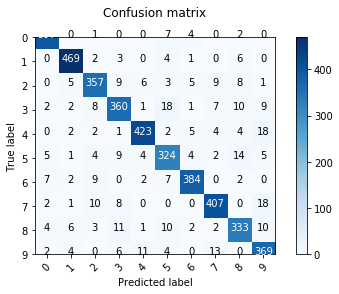

In [13]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title+"\n")
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

# compute the confusion matrix
confusion_mtx = confusion_matrix(Y_val.reshape(4200,1), Y_val_predicted.reshape(4200,1)) 
# plot the confusion matrix
plot_confusion_matrix(confusion_mtx, classes = range(10))